In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

PATH_TO_DATA = "data/data_with_return.csv"
SEED = 404

In [2]:
df = pd.read_csv(PATH_TO_DATA, encoding='UTF-16')
df.sample(5, random_state=SEED)

,TRADEDATE,SECID,NUMTRADES,LEGALCLOSEPRICE,CLOSE,VOLUME,TRENDCLSPR,RETURN
30125,2018-09-17,VZRZ,37,431.0000,431.00000,534,-1.15,-0.011534
10497,2018-04-04,TGKN,34,0.0053,0.00536,98000000,2.88,0.017127
8842,2018-03-21,MSST,50,1.1200,1.12000,24400,0.00,0.004474
24844,2018-08-02,MSRS,113,0.7260,0.72800,4320000,0.28,0.000000
38823,2018-11-29,RUGR,1754,6.2800,6.28000,590660,0.88,0.008797


In [12]:
from functions import get_portfolio_expected_return, get_portfolio_std
N = df.SECID.nunique()
equal_ratios = [1/N]*N
portfolio_expected_return = get_portfolio_expected_return(df, equal_ratios)
portfolio_std = get_portfolio_std(df, equal_ratios)
print(f"Ожидаемая доходность портфеля с равными долями капитала: {portfolio_expected_return:.5f}")
print(f"Стандартное отклонение портфеля с равными долями капитала: {portfolio_std:.5f}")

Ожидаемая доходность портфеля с равными долями капитала: -0.00053
Стандартное отклонение портфеля с равными долями капитала: 0.00708


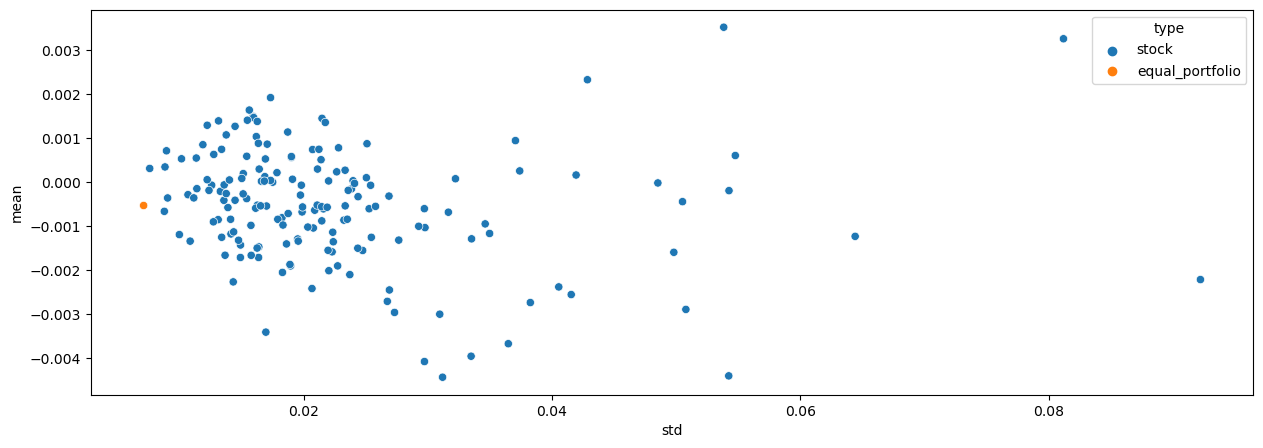

In [14]:
stocks_statistics = df.groupby(by="SECID", as_index=False).aggregate({"RETURN": ["mean", "std"]})["RETURN"]
stocks_statistics["type"] = "stock"

equal_portfolio = pd.DataFrame({"mean": [portfolio_expected_return], "std": [portfolio_std], "type": ["equal_portfolio"]})
stocks_statistics = pd.concat([stocks_statistics, equal_portfolio])

plt.figure(figsize=(15, 5))
sns.scatterplot(data=stocks_statistics, x="std", y="mean", hue="type");

In [24]:
NUM_RANDOM_PORTFOLIO = 5

random_portfolio_df = {"mean": [], "std": [], "type": ["random_portfolio"] * NUM_RANDOM_PORTFOLIO}
for _ in range(NUM_RANDOM_PORTFOLIO):
    ratios = np.random.dirichlet(np.ones(N)).tolist()
    ex_return = get_portfolio_expected_return(df, ratios)
    ex_std = get_portfolio_std(df, ratios)
    random_portfolio_df["mean"].append(ex_return)
    random_portfolio_df["std"].append(ex_std)
random_portfolio_df = pd.DataFrame(random_portfolio_df)

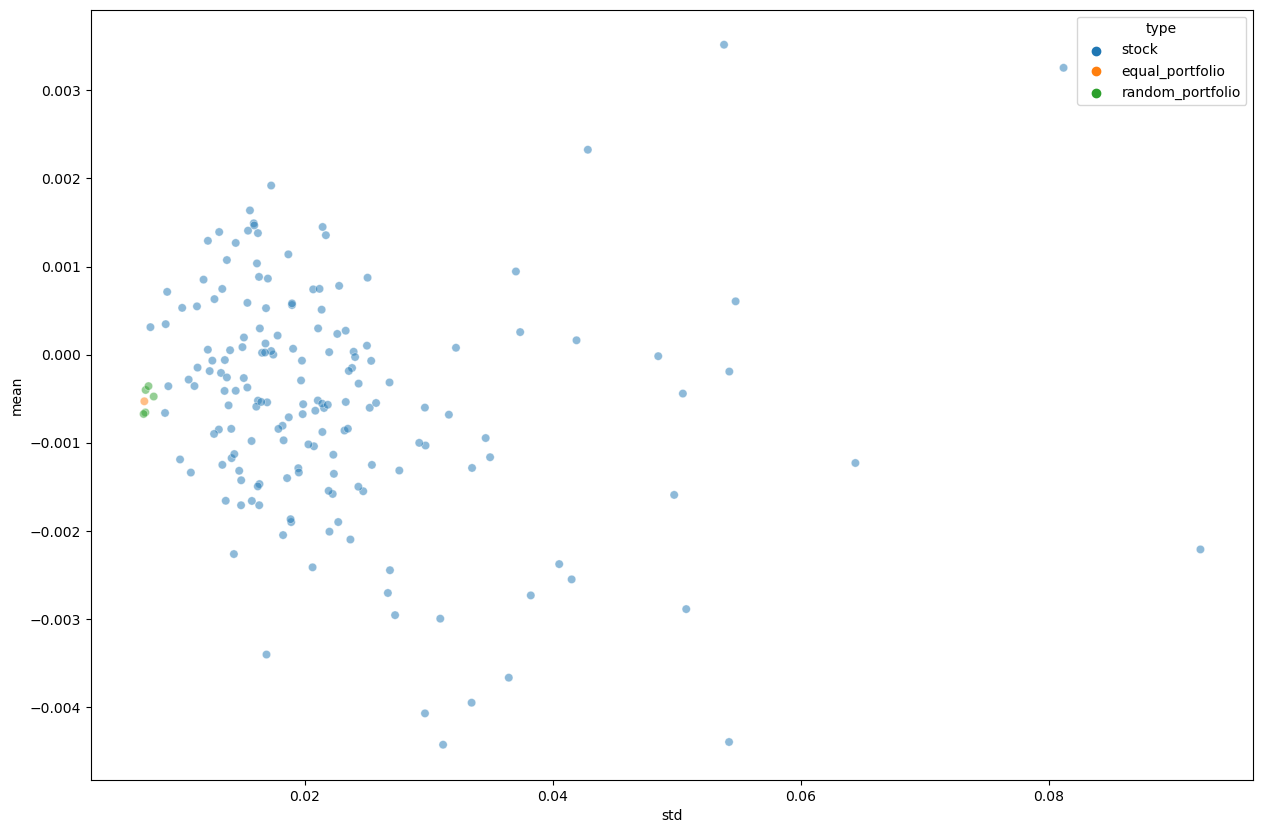

In [25]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=pd.concat([stocks_statistics, random_portfolio_df]), x="std", y="mean", hue="type", alpha=0.5);